In [92]:
import pandas as pd

df = pd.read_excel("Online Retail.xlsx")



In [93]:
df. dropna(subset=['CustomerID'], inplace= True)
df = df[df['Quantity'] > 0]


In [94]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [95]:
import datetime as dt

snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days =1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x : (snapshot_date - x.max()).days,
    'InvoiceNo' : 'nunique',
    'TotalPrice' : 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency' , 'Monetary']

In [96]:
rfm['R'] =pd.qcut(rfm['Recency'], 5, labels = [5,4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method= 'first'), 5, labels = [1,2,3,4,5])
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels =[1,2,3,4,5])


In [97]:
rfm[ ' RFM_Score'] =rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In [ ]:
def segment_customer(row):
    if row['RFM_Score'] == '555':
        return 'Top Customers'
    elif row['R'] == 5:
        return 'Recent Customers'
    elif row['F'] == 5:
        return 'Frequent Buyers'
    elif row['M'] == 5:
        return 'Big Spenders'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)



In [ ]:
print(rfm.dtypes)


In [ ]:
print(rfm.head())


In [ ]:
rfm['R'] = rfm['R'].astype(int)
rfm['F'] = rfm['F'].astype(int)
rfm['M'] = rfm['M'].astype(int)


In [ ]:
print(rfm[['R', 'F', 'M']].dtypes)


In [ ]:
print(rfm.columns)


In [ ]:
rfm.to_csv("rfm_data.csv", index= False)

In [ ]:
import os
print (os.getcwd())


In [ ]:
rfm.to_csv("C:/Users/Dell/Downloads/rfm_data.csv", index = True)

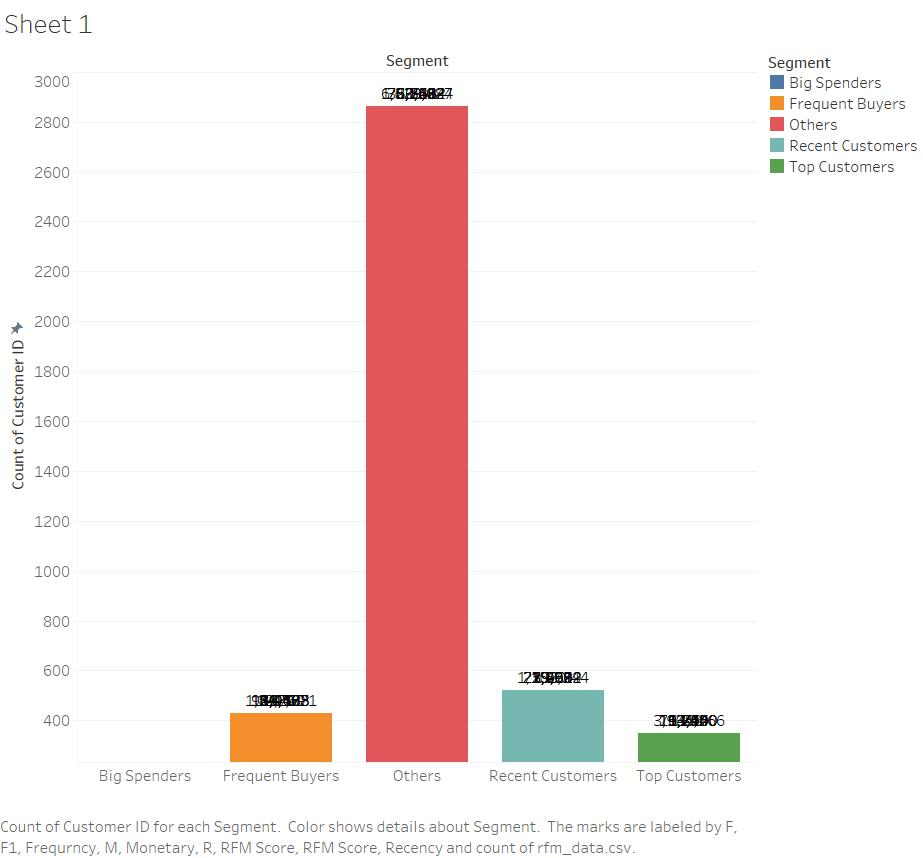

In [103]:
from IPython.display import Image
Image("BIG SPENDER.jpg")


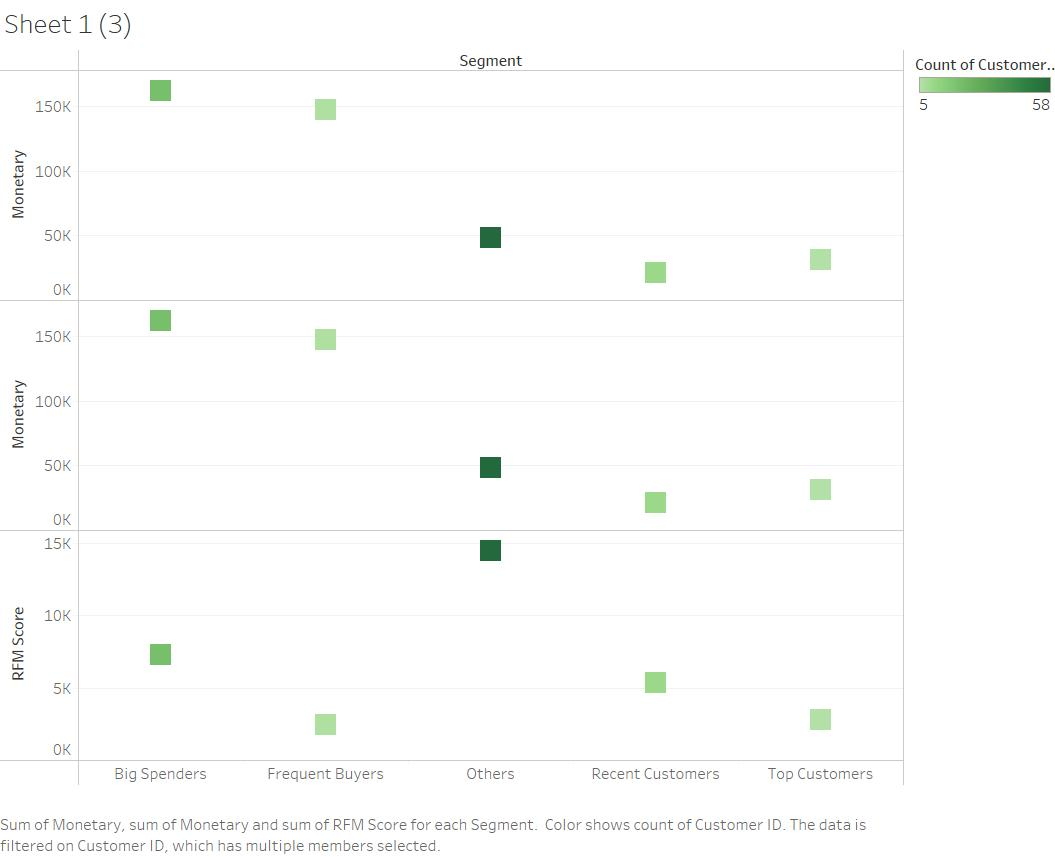

In [101]:
from IPython.display import Image
Image("heat map.jpg")